In [1]:
import numpy as np    #numpy is used to work with arrays and special functions like linear algebra
import pandas as pd   #Used for data processing mainly to read the file
import seaborn as sns #Needed for statistical graphs
import matplotlib.pyplot as plt #Needed for statistical graphs

In [2]:
#Load and preprocess the data

In [3]:
train = pd.read_csv(r'path\train.csv')

In [4]:
train.head() #Display first 5 rows

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train['comment_text'].values #View comments 

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [6]:
train.loc[train['toxic'] >= 1].sample(5) #View first five toxic comments

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
141122,f32560713f415b48,Why \n\ndid you fuck my post on julianfuckton?...,1,0,1,0,0,0
6906,126dac9b19a531c3,"""Talk pages are for talking to other users, th...",1,0,0,0,0,0
32269,55ca7b671aa580fc,Hey! You there! Stop this bullshit! I'll get y...,1,0,1,0,1,0
9342,18cdf7f9e903880d,ClueBot \n\nClueBot is a incredibly crappy pi...,1,0,0,0,0,0
80030,d620446308f8cfa2,go fuck yourselfgo fuck yourselfgo fuck yourse...,1,1,1,0,1,0


In [7]:
train.describe()  #View the statistical data

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.shape #Returns the shape of the array

(159571, 8)

In [9]:
#test.shape #Returns the shape of the array

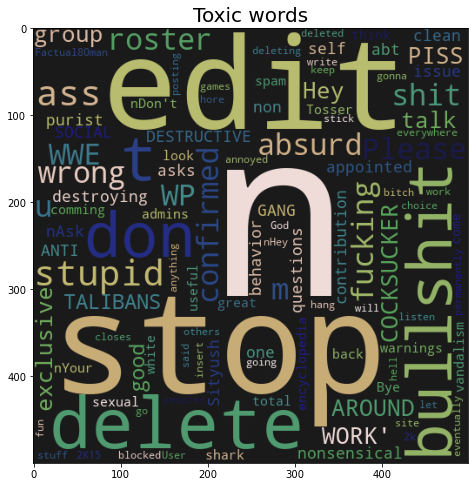

In [10]:
#Can visualize the most used toxic word
from wordcloud import WordCloud,STOPWORDS
comments = train['comment_text'].loc[train['toxic']==1].values
wordcloud = WordCloud( width = 500,height = 500,background_color = 'black',stopwords = STOPWORDS).generate(str(comments))
plt.figure(figsize = (12, 8))
plt.title("Toxic words", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.9)

<AxesSubplot:>

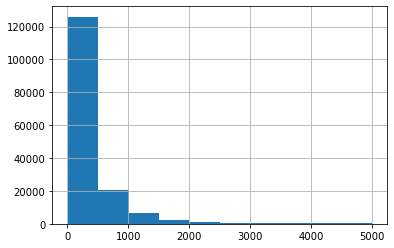

In [11]:
Hist = train.comment_text.str.len()
Hist.hist()

In [12]:
#Data Preprocessing : Tokenizing and Padding

In [13]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text,sequence
from keras.preprocessing.sequence import pad_sequences
#Length of the comments will be set and will be padded to 200
max_length = 400
#Embedding the most frequent words
features = 20000
#Vectorises the values of each text into integers 
tokenizer = text.Tokenizer(features)
#Fit the tokenizer onto the list of a
a = train['comment_text'].values
tokenizer.fit_on_texts(list(a))
#convert the tokenized text into list of sequences of numbers
tokenized = tokenizer.texts_to_sequences(a)
#Padding each of these sequences to the length of 200
train_value = sequence.pad_sequences(tokenized , maxlen = max_length)

In [14]:
print(train_value[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [ ]:
#Concatenating the Glove file
import os
for dirname, _, filenames in os.walk(r'path\archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
word2vec = {}
embedding = 100
with open(os.path.join(r'path\archive\glove.6B.%sd.txt' % embedding)) as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype = 'float32')
        word2vec[word] = vector
        print('Found %s word vectors,.' % len(word2vec))

In [16]:
#Prepare embedding matrix

In [17]:
max_vocab_size = 20000
word2idx = tokenizer.word_index
num_words = min(max_vocab_size, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, embedding))
for word, i in word2idx.items():
      if i < max_vocab_size:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all zeros.
          embedding_matrix[i] = embedding_vector

In [18]:
#Creating the Embedding Layer

In [19]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout, Activation
model = Sequential()
model.add(Embedding(features,embedding,embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),trainable = False))
model.add(Dropout(0.2))

In [20]:
#Building the model

In [21]:
from keras.layers import Dense,Input,GlobalMaxPooling1D
from keras.layers import Conv1D,MaxPooling1D,Embedding
hidden_dims = 250
model.add(Conv1D(128,3,padding = 'valid',activation = 'relu'))
model.add(MaxPooling1D())
model.add(Conv1D(128,3,padding = 'valid',activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims , activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1 , activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         38528     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         49280     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               3

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model.compile(loss = 'binary_crossentropy' , optimizer= 'adam' , metrics = ['accuracy'])

In [24]:
#Training the model

In [25]:
from sklearn.model_selection import train_test_split
b = train['toxic'].values
x_train , x_val , y_train , y_val = train_test_split(train_value , b , test_size = 0.15 ,random_state = 1)

In [26]:
print('Training model')
r = model.fit(x_train , y_train ,batch_size = 32,epochs =3,validation_data = (x_val ,y_val),callbacks=[early_stop])

Training model
Epoch 1/3
4239/4239 [==============================] - 323s 76ms/step - loss: 0.2397 - accuracy: 0.9147 - val_loss: 0.2177 - val_accuracy: 0.9207
Epoch 2/3
4239/4239 [==============================] - 331s 78ms/step - loss: 0.2191 - accuracy: 0.9203 - val_loss: 0.2140 - val_accuracy: 0.9221
Epoch 3/3
4239/4239 [==============================] - 336s 79ms/step - loss: 0.2107 - accuracy: 0.9230 - val_loss: 0.2061 - val_accuracy: 0.9242


In [27]:
y_pred = model.predict(x_val)

In [28]:
y_pred

array([[0.85464895],
       [0.00561368],
       [0.03181994],
       ...,
       [0.06482303],
       [0.07971126],
       [0.14201334]], dtype=float32)

In [29]:
model_losses = pd.DataFrame(r.history)

In [30]:
model_losses

,loss,accuracy,val_loss,val_accuracy
0,0.239664,0.914734,0.217693,0.920663
1,0.219110,0.920293,0.214047,0.922126
2,0.210658,0.922970,0.206082,0.924173


In [31]:
#Evaluate the model

In [32]:
import numpy as np
test = pd.read_csv(r'path\test.csv')


In [33]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [34]:
test1 = test['comment_text'].values

In [35]:
test_tokenized = tokenizer.texts_to_sequences(test1)
testing = sequence.pad_sequences(test_tokenized ,maxlen =max_length)

In [36]:
testing1 =model.predict(testing , verbose = 1 , batch_size= 32)

4787/4787 [==============================] - 82s 17ms/step


In [39]:
testing1.shape

(153164, 1)

In [214]:
o = testing[1]

In [115]:
test['Toxic'] = ['not toxic' if x < .5 else 'toxic' for x in testing1]
a= test[[ 'comment_text' , 'Toxic']].head(20)
a

,comment_text,Toxic
0,Yo bitch Ja Rule is more succesful then you'll...,toxic
1,== From RfC == \n\n The title is fine as it is...,not toxic
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",not toxic
3,":If you have a look back at the source, the in...",not toxic
4,I don't anonymously edit articles at all.,not toxic
5,Thank you for understanding. I think very high...,not toxic
6,Please do not add nonsense to Wikipedia. Such ...,not toxic
7,:Dear god this site is horrible.,not toxic
8,""" \n Only a fool can believe in such numbers. ...",not toxic
9,== Double Redirects == \n\n When fixing double...,not toxic


In [42]:
#SVM and NB model

In [43]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [44]:
#Create a new subset of the data by only taking the 2nd column onwards
train = pd.read_csv(r'p\train.csv')
count= train.iloc[:,2:].sum()

In [45]:
count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [ ]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(count.index, count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()



In [50]:

data_tox = train.loc[:,['id','comment_text','toxic']]
data_sev = train.loc[:,['id','comment_text','severe_toxic']]
data_obs = train.loc[:,['id','comment_text','obscene']]
data_thr = train.loc[:,['id','comment_text','threat']]
data_ins = train.loc[:,['id','comment_text','insult']] 
data_ide = train.loc[:,['id','comment_text','identity_hate']]

<AxesSubplot:>

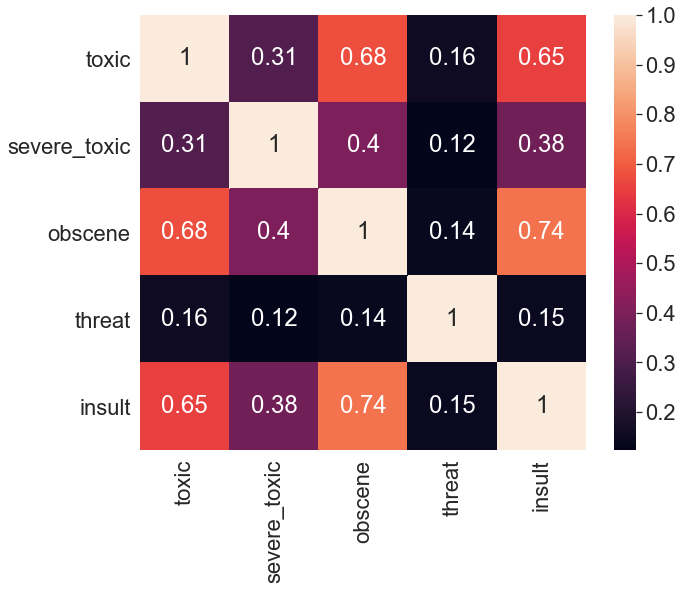

In [219]:
temp_df=train.iloc[:,2:-1]
corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

In [51]:
data_tox

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0


In [52]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]
data_tox_0.shape

(5000, 3)

In [53]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_1.shape

(5000, 3)

In [54]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(10000, 3)

In [55]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [56]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

In [57]:

data_obs[data_obs['obscene'] == 1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [256]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(10000, 3)

In [191]:
data_thr[data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [192]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:478,:]

# We include 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

In [193]:
data_ins[data_ins['insult'] == 1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [194]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(10000, 3)

In [195]:
data_ide[data_ide['identity_hate'] == 1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [196]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[0:1405,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(7025, 3)

In [197]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [198]:
#TD-IDF Vectorizer

In [240]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
def tf_train_test(df_done,label,vectorizer,ngram):
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]



    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    vec = vectorizer(ngram_range=(ngram), stop_words='english')
    
    trn_term_doc = vec.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    test_term_doc  = vec.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    mnb = MultinomialNB()
    mnb.fit(trn_term_doc, y_train)
    
    svm_model = LinearSVC()
    svm_model.fit(trn_term_doc, y_train)


    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(svm_model.predict(test_term_doc), y_test),f1_score(mnb.predict(test_term_doc), y_test)]} 
                    
    # Create DataFrame with the model names as column labels
    Train_f1 = pd.DataFrame(f1_score_data , index=['SVM','MultinomialNB'])  

    return Train_f1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
X = data_tox_done.comment_text
y = data_tox_done['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a Vectorizer object and remove stopwords from the table
vec = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
trn_term_doc = vec.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
test_term_doc  = vec.transform(X_test)   
svm_model = LinearSVC()
svm_model.fit(trn_term_doc, y_train)
c = svm_model.predict(test_term_doc)
confusion_matrix(y_test,c,y)

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time


t0 = time.time()

df_tox_cv = tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

Time taken: 1.1632804870605469 seconds


,F1 Score(toxic)
SVM,0.875293
MultinomialNB,0.872362


In [243]:
t0 = time.time()

df_sev_cv = tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

Time taken: 0.681527853012085 seconds


,F1 Score(severe_toxic)
SVM,0.926004
MultinomialNB,0.936170


In [244]:
t0 = time.time()

df_thr_cv = tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_thr_cv

Time taken: 0.16127800941467285 seconds


,F1 Score(threat)
SVM,0.798535
MultinomialNB,0.511848


In [245]:
t0 = time.time()

df_ins_cv = tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_ins_cv

Time taken: 1.1939172744750977 seconds


,F1 Score(insult)
SVM,0.900738
MultinomialNB,0.891440


In [246]:
t0 = time.time()

df_obs_cv = tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_obs_cv

Time taken: 1.0811042785644531 seconds


,F1 Score(obscene)
SVM,0.921641
MultinomialNB,0.898079


In [247]:
t0 = time.time()

df_ide_cv = tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_ide_cv

Time taken: 0.8139448165893555 seconds


,F1 Score(identity_hate)
SVM,0.799505
MultinomialNB,0.481605


In [255]:
f1_all = pd.concat([df_tox_cv, df_sev_cv,df_ins_cv,df_obs_cv,df_thr_cv,df_ide_cv], axis=1)
f1_all1 = f1_all.transpose()
f1_all1

,SVM,MultinomialNB
F1 Score(toxic),0.875293,0.872362
F1 Score(severe_toxic),0.926004,0.936170
F1 Score(insult),0.900738,0.891440
F1 Score(obscene),0.921641,0.898079
F1 Score(threat),0.798535,0.511848
F1 Score(identity_hate),0.799505,0.481605


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

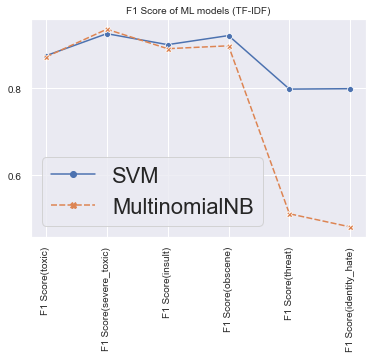

In [254]:
sns.lineplot(data=f1_all1,markers=True)
plt.xticks(rotation='90', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=10)